<a href="https://colab.research.google.com/github/purin96/Data-Science-Projects-2024/blob/main/pima_classification_baseline_04ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
content

NameError: name 'content' is not defined

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/sample_data/diabetes_feature.csv")
df.shape

(768, 16)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 학습과 예측에 사용될 데이터

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [ ]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age',
     'Pregnancies_high',
       'Insulin_nan',
       'low_glu_insulin']]
X.shape

(768, 9)

In [ ]:
y=df["Outcome"]
y.shape

(768,)

# 학습과 예측에 사용할 데이터셋 만들기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [ ]:
X_test.shape,y_test.shape

((154, 9), (154,))

# 학습하기

# 결정트리

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42,max_depth=5)
# model

DecisionTreeClassifier(max_depth=5, random_state=42)

# 랜덤포레스트

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(random_state=42)
# model

RandomForestClassifier(random_state=42)

# 부스팅 알고리즘

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42,max_depth=10)
model

GradientBoostingClassifier(max_depth=10, random_state=42)

In [ ]:
for max_depth in range(3,12):
  model = DecisionTreeClassifier(random_state=42,max_depth=max_depth)
  y_predict = model.fit(X_train,y_train).predict(X_test)
  score = accuracy_score(y_test,y_predict)*100
  print(max_depth,score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


In [ ]:
model

RandomForestClassifier(random_state=42)

In [ ]:
max_depth = np.random.randint(4,20,10)

In [ ]:
max_features = np.random.uniform(0.7,1.0,100)
max_features

array([0.83193753, 0.98252351, 0.92435947, 0.96389994, 0.73796404,
       0.96482015, 0.84205865, 0.93059849, 0.7023218 , 0.9834782 ,
       0.98614345, 0.7908212 , 0.94314281, 0.88519913, 0.94584769,
       0.81379376, 0.76577488, 0.9936466 , 0.70566692, 0.8409614 ,
       0.90508353, 0.77388258, 0.9638404 , 0.91951383, 0.95801596,
       0.83793638, 0.70332583, 0.92357034, 0.85363506, 0.82981083,
       0.95049302, 0.90851237, 0.99463637, 0.90964132, 0.79919152,
       0.88019405, 0.95689148, 0.98313091, 0.97776661, 0.71840563,
       0.71492306, 0.95755277, 0.89776997, 0.98781581, 0.76223972,
       0.79396987, 0.91587244, 0.80959229, 0.75657395, 0.95347231,
       0.96976871, 0.7313232 , 0.81006505, 0.80928934, 0.85159082,
       0.87251403, 0.96591739, 0.94387433, 0.99506827, 0.95077115,
       0.82888875, 0.98813861, 0.81397066, 0.78446488, 0.82163996,
       0.89969887, 0.76926722, 0.92547166, 0.90459673, 0.98241229,
       0.79982894, 0.87764109, 0.98206889, 0.82220475, 0.88151

In [ ]:
param_distributions = {"max_depth":max_depth,"max_features":max_features,"min_samples_split":list(range(2,7))}
param_distributions

{'max_depth': array([16, 14, 13,  4, 19, 17,  6, 14, 17, 12]),
 'max_features': array([0.83193753, 0.98252351, 0.92435947, 0.96389994, 0.73796404,
        0.96482015, 0.84205865, 0.93059849, 0.7023218 , 0.9834782 ,
        0.98614345, 0.7908212 , 0.94314281, 0.88519913, 0.94584769,
        0.81379376, 0.76577488, 0.9936466 , 0.70566692, 0.8409614 ,
        0.90508353, 0.77388258, 0.9638404 , 0.91951383, 0.95801596,
        0.83793638, 0.70332583, 0.92357034, 0.85363506, 0.82981083,
        0.95049302, 0.90851237, 0.99463637, 0.90964132, 0.79919152,
        0.88019405, 0.95689148, 0.98313091, 0.97776661, 0.71840563,
        0.71492306, 0.95755277, 0.89776997, 0.98781581, 0.76223972,
        0.79396987, 0.91587244, 0.80959229, 0.75657395, 0.95347231,
        0.96976871, 0.7313232 , 0.81006505, 0.80928934, 0.85159082,
        0.87251403, 0.96591739, 0.94387433, 0.99506827, 0.95077115,
        0.82888875, 0.98813861, 0.81397066, 0.78446488, 0.82163996,
        0.89969887, 0.76926722, 0.925

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(
 model, param_distributions,n_iter= 10000, scoring="accuracy" , n_jobs=-1,cv=5,
 random_state=42
)
clf.fit(X_train,y_train)

NameError: name 'param_distributions' is not defined

In [ ]:
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
model.feature_importances_

array([1.06383534e-01, 6.46636731e-03, 6.63081400e-02, 3.62790633e-02,
       2.58439505e-02, 9.61504601e-02, 1.56708089e-04, 6.62411777e-01,
       0.00000000e+00])

In [ ]:
feature_names = X_train.columns.tolist()

<Axes: >

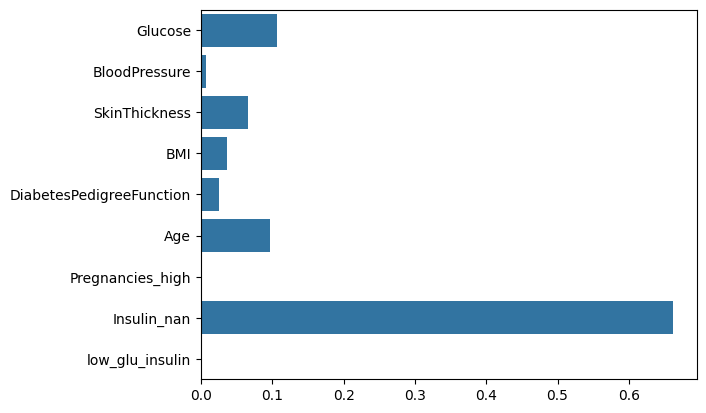

In [ ]:
sns.barplot(x=model.feature_importances_,y=feature_names)

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.008230,0.003388,0.003450,0.000136,4,0.679961,5,"{'min_samples_split': 4, 'max_features': 0.679...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
93,0.005744,0.000413,0.003526,0.000215,2,0.886288,4,"{'min_samples_split': 2, 'max_features': 0.886...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,2
56,0.006532,0.001279,0.003461,0.000051,5,0.819403,4,"{'min_samples_split': 5, 'max_features': 0.819...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,2
22,0.011238,0.003511,0.006960,0.001522,4,0.871864,4,"{'min_samples_split': 4, 'max_features': 0.871...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,2
49,0.006960,0.001106,0.003637,0.000305,6,0.918996,11,"{'min_samples_split': 6, 'max_features': 0.918...",0.829268,0.894309,0.829268,0.878049,0.901639,0.866507,0.031349,5


In [ ]:
feature_names = X_train.columns.tolist()

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
tree=plot_tree(model,feature_names=feature_names,fontsize=10,filled=True)

NameError: name 'feature_names' is not defined

<Figure size 1500x1500 with 0 Axes>

In [ ]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

# 정확도 측정하기

In [ ]:
abs(y_predict!=y_test).sum()

24

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

84.4155844155844

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

{'max_depth': 5, 'max_features': 0.7}

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

0.8664934026389444

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.017883,0.002873,0.008891,0.003152,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.010460,0.003913,0.003797,0.000706,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.012065,0.003808,0.003526,0.000441,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.007156,0.000880,0.003786,0.000299,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.006332,0.000041,0.003831,0.000155,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [ ]:
#test데이터 넣기
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
clf.score(X_test,y_test)

0.8701298701298701